<a href="https://colab.research.google.com/github/Mayuri163/advertisement_sales/blob/main/framex_sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Name - Mayuri More***
* FRAMEX SOLUTION
* Machine Learning Internship - T2 - SALES PREDICTION

# DataType

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
sale=pd.read_csv('Advertising.csv')
sale

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
sale.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# DataType Conversion

In [ ]:
sale.info() # Display all information about data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Here iloc is method used for indexing and selection of data.
# [:,1:] indicates selecting all rows from index position 1 , as it will eliminate unnamed row.
sale2=sale.iloc[:,1:]
sale2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
sale=sale.copy() #it will make copy of our original data

# Duplicate

In [ ]:
sale2[sale2.duplicated()].shape # In our data there is no duplicate values .

(0, 4)

# Correlation Matrix

In [ ]:
sale2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Scatterplot

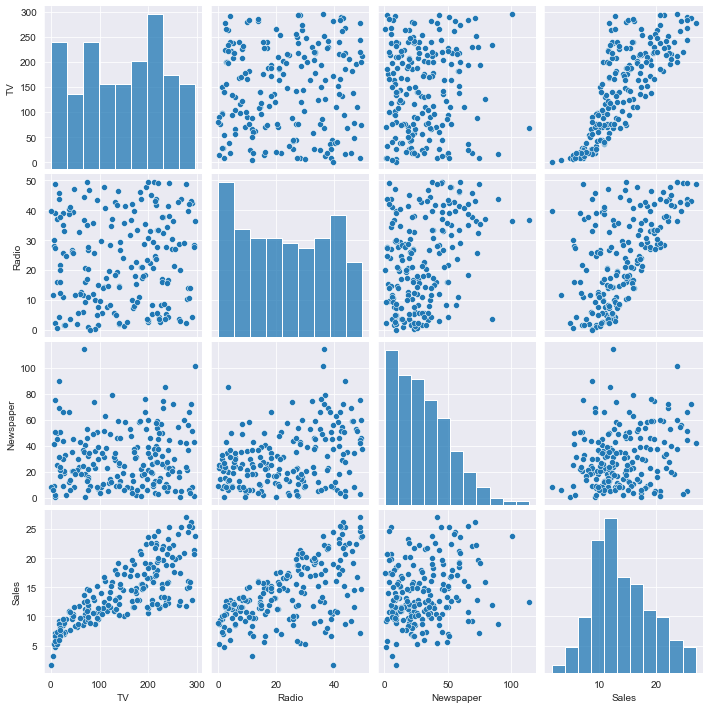

In [ ]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(sale2)

# Outlier detection

<AxesSubplot:>

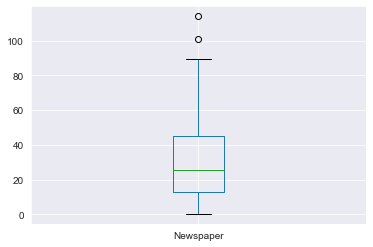

In [ ]:
sale2.boxplot(column=['Newspaper'])
## Here we can see 2 outliers , so newspaper is fitted model.

<AxesSubplot:>

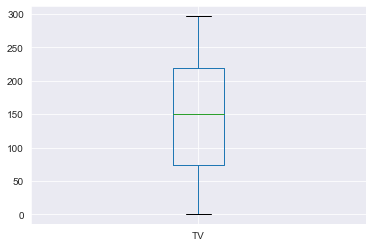

In [ ]:
sale2.boxplot(column=['TV'])
# No Outliers so it is best fitted model to predict sale

<AxesSubplot:>

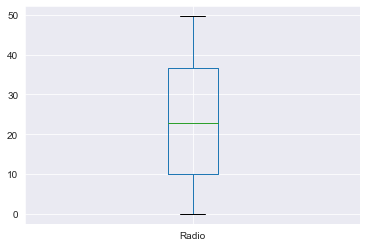

In [ ]:
sale2.boxplot(column=['Radio'])
# No outlier so it is also best fitted value to predict sale

# Preparing model

In [ ]:
import statsmodels.formula.api as smf
ml = smf.ols('Sales~TV+Radio+Newspaper',data=sale2).fit()
ml.summary()

# Here R2 value is 0.897 which is greater than 0.85 so consider it as best model but
# p value of Newspaper is o.860 not less than 0.05 it contains outlier.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.58e-96
Time:                        22:03:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As p value of Radio= 0.000 and TV = 0.000 is best fitted so we will use them as Predictors.

# Simple Linear Regression

In [ ]:

ml_v=smf.ols('Sales~TV+Radio',data = sale2).fit()
ml_v.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           4.83e-98
Time:                        22:03:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* RESULT = Advertising on TV and Radio contributes most in Sales and Newspaper advertisement have little effect on sales .

# Split the Data

In [ ]:
array=sale2.values
x=array[:,[0,1,2]]
y=array[:,3]
#x = np.array(sale2.drop(["Sales"],1))
#y = np.array(sale2["Sales"])

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(xtrain, ytrain)
ypred=model.predict(xtest)

data=pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
# ypred=predicted value , flatten=it is used to convert multi-dimensional array into 1-dimensional array
data

,Predicted Sales
0,16.565396
1,21.188228
2,21.551071
3,10.889238
4,22.202320
5,13.355569
6,21.196925
7,7.350285
8,13.275471
9,15.124495
